# CASO PRACTICO 1: Covid 19 and Logistic Regression 

La enfermedad por coronavirus (COVID-19) es una enfermedad infecciosa causada por un coronavirus recién descubierto. La mayoría de las personas infectadas con el virus del COVID-19 experimentarán una enfermedad respiratoria leve a moderada y se recuperarán sin necesidad de un tratamiento especial. Las personas mayores y aquellas con problemas médicos subyacentes, como enfermedades cardiovasculares, diabetes, enfermedades respiratorias crónicas y cáncer, tienen más probabilidades de desarrollar una enfermedad grave. Durante todo el curso de la pandemia, uno de los principales problemas que han enfrentado los proveedores de atención médica ha sido la escasez de recursos médicos y la falta de un plan adecuado para distribuirlos eficientemente. En estos tiempos difíciles, ser capaces de predecir qué tipo de recurso podría necesitar un individuo al momento de ser diagnosticado positivo, o incluso antes de eso, sería de gran ayuda para las autoridades, ya que podrían adquirir y organizar los recursos necesarios para salvar la vida de ese paciente.

El objetivo principal de esta practica es construir un modelo de aprendizaje automático que, dados los síntomas actuales, el estado y el historial médico de un paciente con COVID-19, prediga si el paciente está en alto riesgo o no.

* sexo: 1 para mujer y 2 para hombre.
* edad: del paciente.
* clasificación: resultados de la prueba de COVID. Los valores 1-3 significan que el paciente fue diagnosticado con COVID en diferentes grados. 4 o más significa que el paciente no es portador de COVID o que la prueba es inconclusa.
* tipo de paciente: tipo de atención que recibió el paciente en la unidad. 1 para enviado a casa y 2 para hospitalización.
* neumonía: si el paciente ya tiene inflamación de los sacos de aire o no.
* embarazo: si el paciente está embarazada o no.
* diabetes: si el paciente tiene diabetes o no.
* EPOC: indica si el paciente tiene enfermedad pulmonar obstructiva crónica o no.
* asma: si el paciente tiene asma o no.
* inmunosuprimido: si el paciente está inmunosuprimido o no.
* hipertensión: si el paciente tiene hipertensión o no.
* cardiovascular: si el paciente tiene una enfermedad relacionada con el corazón o los vasos sanguíneos.
* renal crónica: si el paciente tiene enfermedad renal crónica o no.
* otra enfermedad: si el paciente tiene otra enfermedad o no.
* obesidad: si el paciente es obeso o no.
* tabaco: si el paciente es usuario de tabaco.
* USMR: indica si el paciente fue atendido en unidades médicas de primer, segundo o tercer nivel.
* unidad médica: tipo de institución del Sistema Nacional de Salud que brindó la atención.
* intubado: si el paciente fue conectado al ventilador.
* UCI: indica si el paciente fue ingresado en una Unidad de Cuidados Intensivos.
* fecha de fallecimiento: si el paciente falleció, se indica la fecha de muerte; de lo contrario, 9999-99-99.

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#librerias 
#se puse de mas jaja por que tenia problemas con algunos graficos y chat gpt me lo corrigio y sugirio que pusiera estas de mas 
#tambien se uso: ->from xgboost import XGBClassifier<- para comparar la presicion del modelo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [5]:
#archivo .csv

df = pd.read_csv("Covid_Data.csv")


## muestra de datos proporcionados por el .csv

In [6]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [7]:
# Check duplication percentage:
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

Este bloque de código calcula el porcentaje de filas duplicadas en el DataFrame. Se usa df.duplicated().sum() para contar el número de filas duplicadas y se divide por el total de filas del DataFrame (df.shape[0]), multiplicándolo por 100 para obtener el porcentaje. Detectar duplicados es importante, ya que puede afectar la calidad del modelo de predicción.

In [8]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [9]:
# Check for missing values
#Verificación de valores faltantes
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [10]:
#But this is not our actual status regarding missing values, let's reveal our true status:
#Esto no refleja completamente el estado de los valores faltantes, revelemos el estado real:
df_null = df.copy()
for i in [97, 98, 99]:
   df_null.replace(i , np.nan, inplace = True)

In [11]:
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

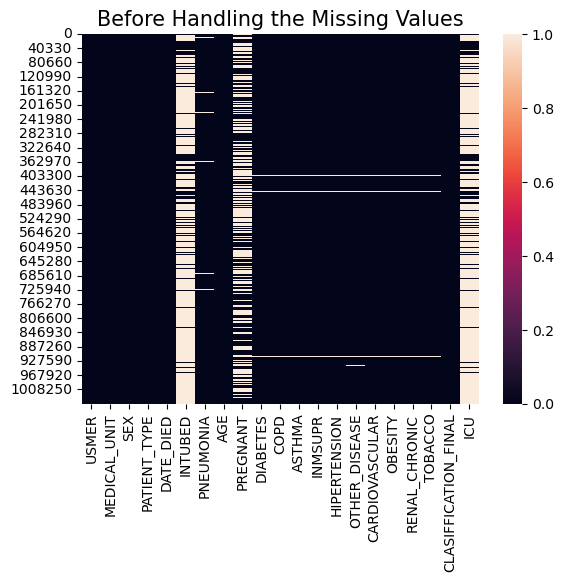

In [12]:
#Antes de manejar los valores faltantes
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [13]:
# Check for any strings in the feature "DATE_DIED"
df['DATE_DIED'][df['DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [14]:
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [15]:
df['DEAD'].value_counts()

DEAD
0    971633
1     76942
Name: count, dtype: int64

In [16]:
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [17]:
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [26]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

In [27]:
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4                NaT
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [28]:
df['DATE_DIED'].isnull().sum()

1018083

In [29]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,min,25%,50%,75%,max,std
USMER,1.632,1.0,1.0,2.0,2.0,2.0,0.482
MEDICAL_UNIT,8.981,1.0,4.0,12.0,12.0,13.0,3.723
SEX,1.499,1.0,1.0,1.0,2.0,2.0,0.5
PATIENT_TYPE,1.191,1.0,1.0,1.0,1.0,2.0,0.393
DATE_DIED,2020-06-25 13:50:19.126328320,2020-01-02 00:00:00,2020-04-05 00:00:00,2020-07-05 00:00:00,2020-10-05 00:00:00,2021-12-04 00:00:00,NaN
INTUBED,79.523,1.0,97.0,97.0,97.0,99.0,36.869
PNEUMONIA,3.347,1.0,2.0,2.0,2.0,99.0,11.913
AGE,41.794,0.0,30.0,40.0,53.0,121.0,16.907
PREGNANT,49.766,1.0,2.0,97.0,97.0,98.0,47.511
DIABETES,2.186,1.0,2.0,2.0,2.0,98.0,5.424


<Figure size 1000x600 with 0 Axes>

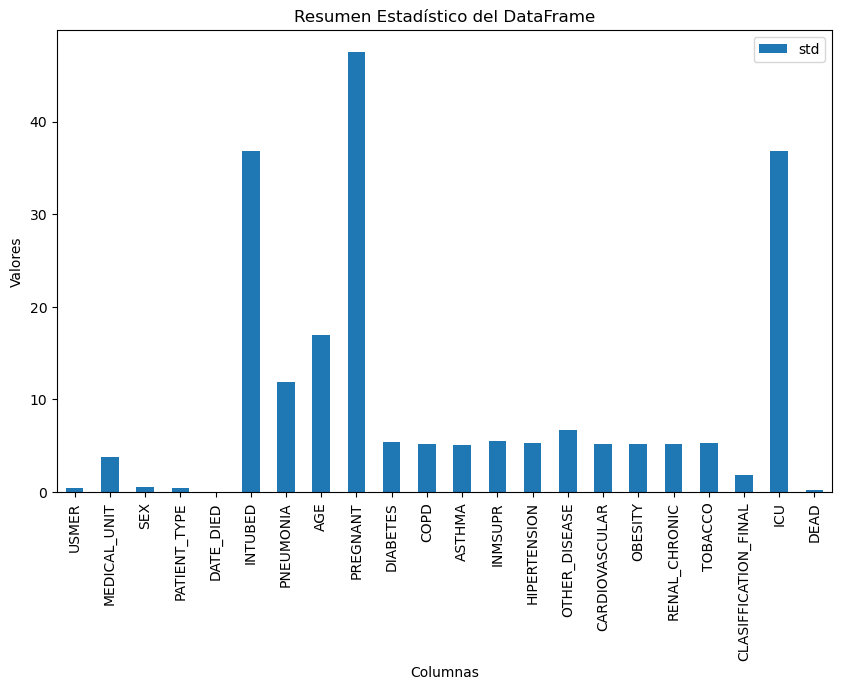

In [30]:
# Obtener las estadísticas descriptivas y ajustar la tabla
summary = df.describe().round(3).T.drop('count', axis=1)

# Crear una gráfica con un tamaño específico
plt.figure(figsize=(10, 6))  # Cambia el tamaño de la gráfica (ancho, alto)

# Crear un gráfico de barras de los estadísticos de resumen
summary.plot(kind='bar', figsize=(10, 6))  # También se puede definir aquí

# Añadir etiquetas y título
plt.title("Resumen Estadístico del DataFrame")
plt.ylabel("Valores")
plt.xlabel("Columnas")

# Mostrar la gráfica
plt.show()


In [31]:
#First, let's deal with our missing data (values of 97, 98 and 99):¶
#We can notice that we have major missing values at the following features:
#1- "ICU"
#2- "INTUBED"
#3- "PREGNANT"
#We ignored those of the "DATE_DIED" feature; as those values aren't actually missing ;D¶

df['AGE'][df['AGE'] > 110].value_counts().sum()

#Obviously these values are 90% most likely to be missing data,
#but we are going to ignore that (as they are very very few) and
#assume that these people are "Centenarians" with ages greater than 110.

22

In [32]:
df.SEX.value_counts()

SEX
1    525064
2    523511
Name: count, dtype: int64

In [33]:

# Asignar los valores correspondientes de la columna 'PREGNANT' para las mujeres (SEX == 1)
pregnant_values = df[df['SEX'] == 1]['PREGNANT']

# Crear una tabla de frecuencia para contar los valores únicos de la columna 'PREGNANT'
pregnant_summary = pregnant_values.value_counts().reset_index()

# Renombrar las columnas de la tabla
pregnant_summary.columns = ['PREGNANT', 'COUNT']

# Añadir una columna para el porcentaje
pregnant_summary['PERCENTAGE'] = (pregnant_summary['COUNT'] / pregnant_values.shape[0]) * 100

# Mostrar la tabla
pregnant_summary


,PREGNANT,COUNT,PERCENTAGE
0,2,513179,97.736466
1,1,8131,1.548573
2,98,3754,0.714960


In [34]:
df[(df['SEX'] == 1)]['PREGNANT'] # Females corresponding values in 'PREGNANT' feature

0          2
3          2
5          2
6          2
7          2
          ..
1048563    2
1048564    2
1048565    2
1048567    2
1048569    2
Name: PREGNANT, Length: 525064, dtype: int64

In [35]:
df['PREGNANT'].value_counts()

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

In [36]:
df['PREGNANT'].replace (97, 2, inplace = True)

In [37]:
df['PREGNANT'].value_counts()

PREGNANT
2     1036690
1        8131
98       3754
Name: count, dtype: int64

In [38]:
df.ICU.value_counts()

ICU
97    848544
2     175685
1      16858
99      7488
Name: count, dtype: int64

In [39]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n",
               "--------------------------------------------------------------------------------", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 -------------------------------------------------------------------------------- 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 -----------------

From the above we can see that the missing values of (97) are all corresponding to the values of PATIENT_TYPE = 1 which is for non hospitalized patients, while those of (99) are the missing values of the hospitalized patients, which again can not be telled or predicted.¶


So we can replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ICU.

In [40]:
df['ICU'].replace (97, 2, inplace = True)

In [41]:
df.ICU.value_counts()

ICU
2     1024229
1       16858
99       7488
Name: count, dtype: int64

In [42]:
for i in [98, 99]:
   df.replace(i , np.nan, inplace = True)

In [43]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,97.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,97.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,NaT,97.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,97.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,97.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [153]:
# First, let's temporarily reverse the step we did on "DATE_DIED" feature; as they are not really missing:
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
Covid_or_Not                0
dtype: int64

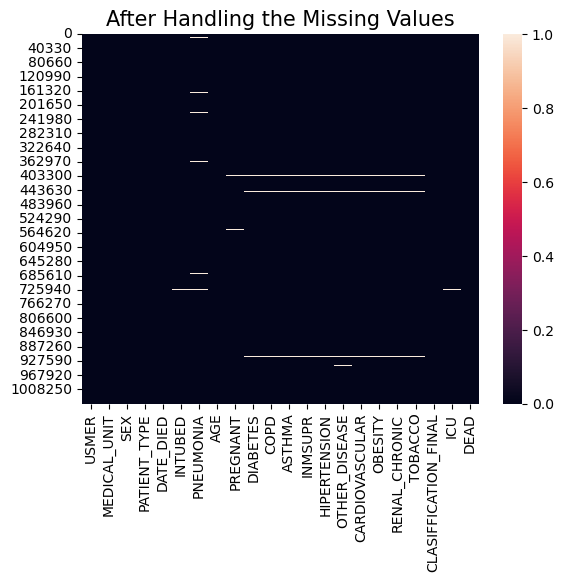

In [46]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

# Exploracion de datos 
1. INTUBED (Intubado)
Impacto: Los pacientes intubados suelen estar en estado crítico y tienen una mayor probabilidad de ser portadores de Covid, ya que requieren asistencia respiratoria avanzada. Intubar a un paciente es un indicador de que su capacidad respiratoria se ha visto gravemente comprometida, lo cual es común en los casos graves de Covid-19 .
Referencia: Pacientes intubados tienen una mayor tasa de mortalidad, y entre los que son portadores de Covid-19, la tasa de mortalidad es significativamente mayor (alrededor del 50%) .
2. PNEUMONIA (Neumonía)
Impacto: La neumonía es una complicación común y grave entre los portadores de Covid-19. Los pacientes que desarrollan neumonía presentan un deterioro significativo en su capacidad pulmonar, lo que a menudo resulta en hospitalización .
Referencia: Los pacientes con neumonía tienen una alta probabilidad de desarrollar formas graves de Covid, lo que aumenta la necesidad de cuidados intensivos y ventilación mecánica .
3. AGE (Edad)
Impacto: La edad es uno de los factores de riesgo más significativos para los portadores de Covid-19. Los estudios han demostrado que a mayor edad, mayor es el riesgo de complicaciones graves y mortalidad .
Referencia: Los adultos mayores, especialmente aquellos de 60 años o más, tienen un riesgo elevado de contraer formas graves de Covid, con una tasa de mortalidad considerablemente mayor .
4. PREGNANT (Embarazo)
Impacto: Aunque los estudios iniciales no encontraron una relación fuerte entre el embarazo y la gravedad de Covid, investigaciones posteriores indicaron que las mujeres embarazadas son más susceptibles a complicaciones graves debido a cambios inmunológicos y respiratorios .
Referencia: Las mujeres embarazadas portadoras de Covid-19 tienen más probabilidades de desarrollar complicaciones respiratorias y podrían requerir hospitalización .
5. DIABETES
Impacto: La diabetes es un factor de riesgo bien documentado en portadores de Covid-19. Los pacientes diabéticos tienen un sistema inmunológico debilitado y mayor probabilidad de desarrollar complicaciones graves .
Referencia: Las personas con diabetes tienen un mayor riesgo de hospitalización y mortalidad si son portadoras de Covid-19, con tasas de complicaciones significativamente más altas .
6. COPD (Enfermedad Pulmonar Obstructiva Crónica)
Impacto: Los pacientes con EPOC están en un riesgo significativamente mayor de complicaciones graves si son portadores de Covid-19. La EPOC daña los pulmones, lo que exacerba los síntomas respiratorios de Covid .
Referencia: Los pacientes con EPOC tienen una mayor necesidad de hospitalización y de ventilación mecánica si son portadores de Covid-19 .
7. ASTHMA (Asma)
Impacto: Aunque el asma no se ha identificado como un factor de riesgo tan fuerte como otras condiciones respiratorias, los pacientes asmáticos todavía tienen un riesgo aumentado de sufrir complicaciones respiratorias si son portadores de Covid .
Referencia: Los portadores de Covid-19 con asma pueden experimentar un empeoramiento de sus síntomas respiratorios, pero el riesgo de hospitalización no es tan alto como en otras condiciones respiratorias crónicas .
8. INMSUPR (Inmunosupresión)
Impacto: Las personas inmunosuprimidas tienen un riesgo mucho mayor de desarrollar formas graves de Covid-19 debido a su capacidad reducida para combatir infecciones .
Referencia: Los pacientes inmunosuprimidos son más propensos a requerir cuidados intensivos y tienen tasas de mortalidad más altas si son portadores de Covid-19 .
9. HIPERTENSION (Hipertensión)
Impacto: La hipertensión ha sido identificada como uno de los principales factores de riesgo para complicaciones graves en portadores de Covid-19. A menudo se asocia con enfermedades cardíacas y renales, lo que agrava la gravedad de la infección .
Referencia: Los pacientes con hipertensión tienen tasas de hospitalización más altas y están en mayor riesgo de fallecer si son portadores de Covid-19 .
10. OTHER_DISEASE (Otras enfermedades)
Impacto: Otras enfermedades crónicas, como enfermedades hepáticas o autoinmunes, aumentan el riesgo de complicaciones en portadores de Covid-19. Estas condiciones pueden debilitar el cuerpo y dificultar su capacidad para combatir el virus .
Referencia: Pacientes con otras enfermedades crónicas suelen tener peores resultados clínicos si son portadores de Covid-19 .
11. CARDIOVASCULAR (Enfermedad Cardiovascular)
Impacto: Las enfermedades cardiovasculares aumentan el riesgo de hospitalización y muerte en portadores de Covid-19. La infección puede provocar daños adicionales en el sistema cardiovascular .
Referencia: Los portadores de Covid-19 con enfermedades cardiovasculares tienen una mayor probabilidad de sufrir insuficiencia cardíaca o un accidente cerebrovascular .
12. OBESITY (Obesidad)
Impacto: La obesidad es uno de los principales factores de riesgo para desarrollar formas graves de Covid-19. Los estudios han demostrado que la obesidad afecta la función pulmonar y está asociada con una mayor inflamación .
Referencia: Las personas con obesidad tienen mayores tasas de hospitalización y mortalidad si son portadores de Covid-19 .
13. RENAL_CHRONIC (Enfermedad Renal Crónica)
Impacto: La enfermedad renal crónica afecta la capacidad del cuerpo para eliminar desechos, lo que empeora las complicaciones en los portadores de Covid-19 .
Referencia: Los pacientes con enfermedad renal crónica tienen mayores tasas de hospitalización y mortalidad .
14. TOBACCO (Tabaquismo)
Impacto: Los usuarios de tabaco están en mayor riesgo de complicaciones graves si son portadores de Covid-19, ya que fumar debilita el sistema respiratorio .
Referencia: Los fumadores tienen una mayor probabilidad de ser hospitalizados y de requerir ventilación mecánica .

In [47]:
df.describe().round(3).T.drop('count', axis = 1)

,mean,min,25%,50%,75%,max,std
USMER,1.632,1.0,1.0,2.0,2.0,2.0,0.482
MEDICAL_UNIT,8.981,1.0,4.0,12.0,12.0,13.0,3.723
SEX,1.499,1.0,1.0,1.0,2.0,2.0,0.5
PATIENT_TYPE,1.191,1.0,1.0,1.0,1.0,2.0,0.393
DATE_DIED,2020-06-25 13:50:19.126328320,2020-01-02 00:00:00,2020-04-05 00:00:00,2020-07-05 00:00:00,2020-10-05 00:00:00,2021-12-04 00:00:00,NaN
INTUBED,79.386,1.0,97.0,97.0,97.0,97.0,36.962
PNEUMONIA,1.864,1.0,2.0,2.0,2.0,2.0,0.342
AGE,41.783,0.0,30.0,40.0,53.0,121.0,16.89
PREGNANT,1.992,1.0,2.0,2.0,2.0,2.0,0.088
DIABETES,1.88,1.0,2.0,2.0,2.0,2.0,0.324


ValueError: could not convert string to float: 'A Covid 19 Carrier'

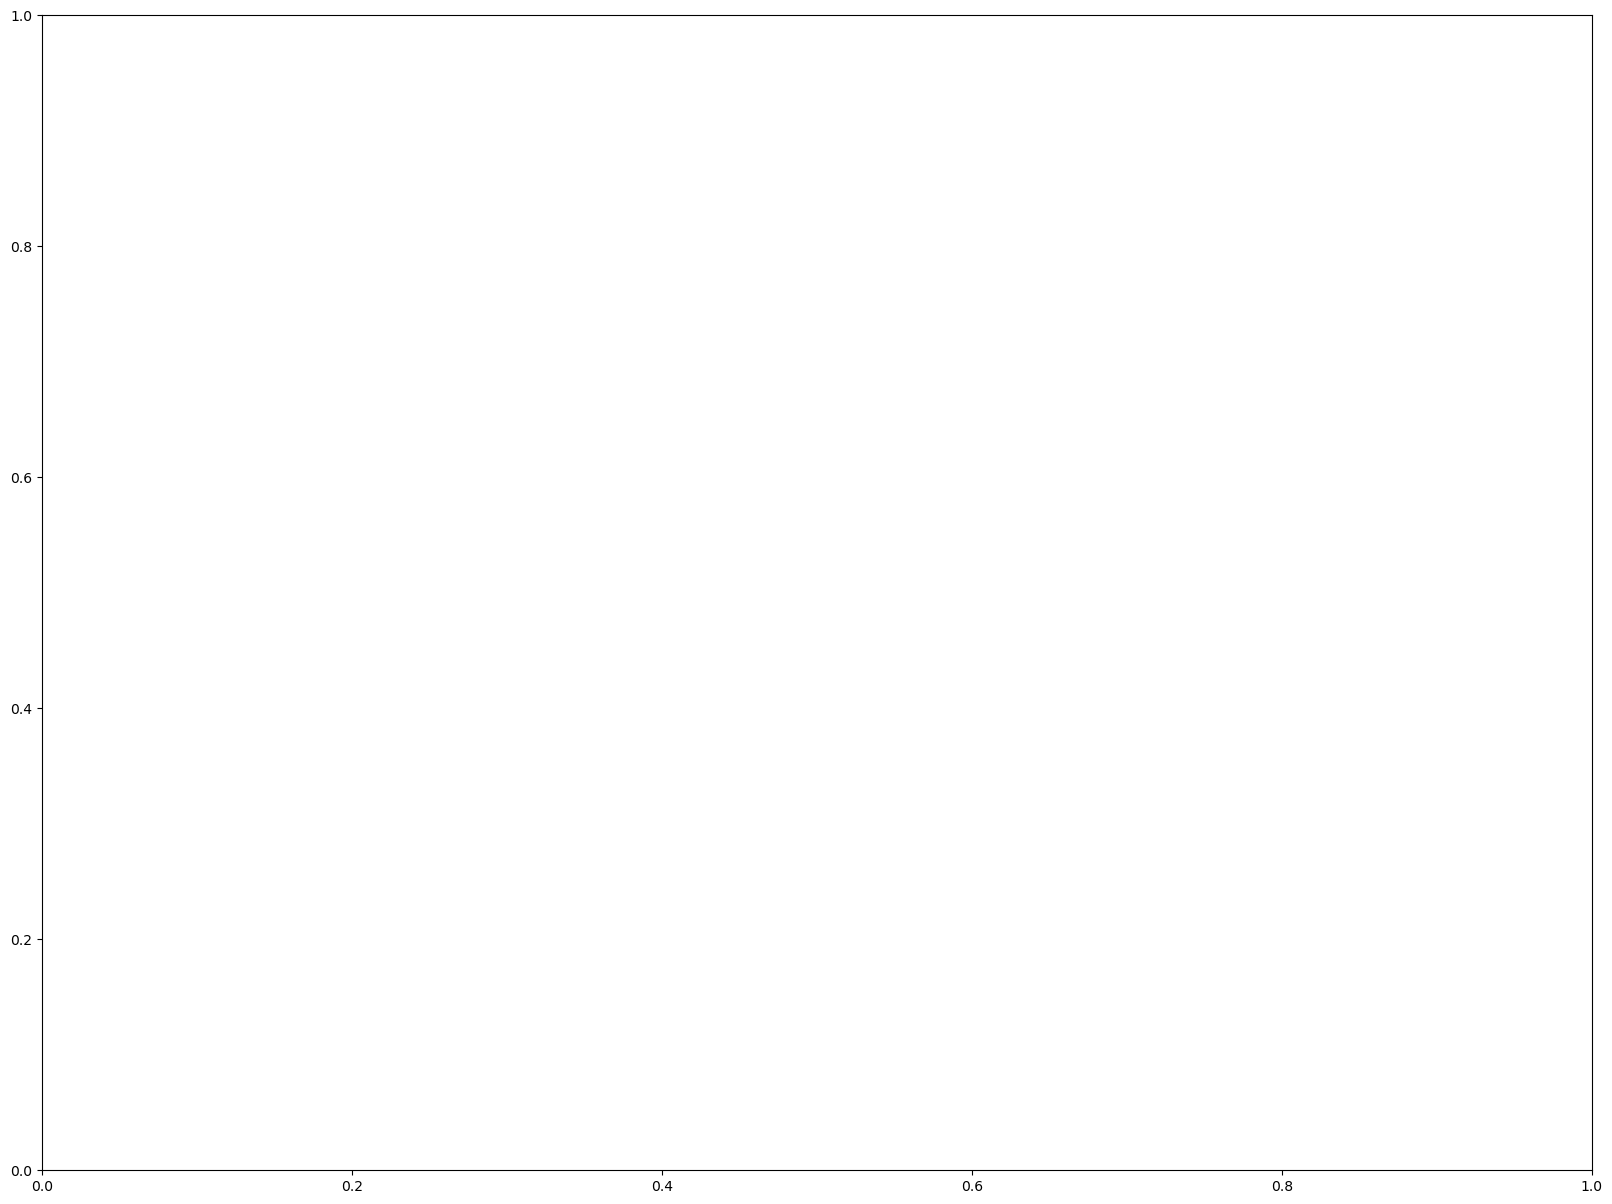

In [164]:
fig, ax = plt.subplots(figsize=(20, 15))
mask=np.triu(np.ones_like(df.drop(columns=['DATE_DIED']).corr()))
sns.heatmap(df.drop(columns=['DATE_DIED']).corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

As colors go darker that indicates positive correlation, and as they go lighter that indicates negative correlation.¶

Also as the darkness or the lightness increases that indicates the increasing of the strength of the corresponding correlation.

In [49]:
# Let's first create a new DataFrame for medical conditions only:
df_med = df.drop(columns=['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
                          'INTUBED', 'AGE', 'CLASIFFICATION_FINAL', 'ICU'], axis=1)
df_med

,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEAD
0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1
2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048571,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0
1048572,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0
1048573,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [50]:
df_med.duplicated(keep = False).sum()

1046563

We can see that there are 1046563 patients with similar conditions split into some groups of patients with the same conditions¶

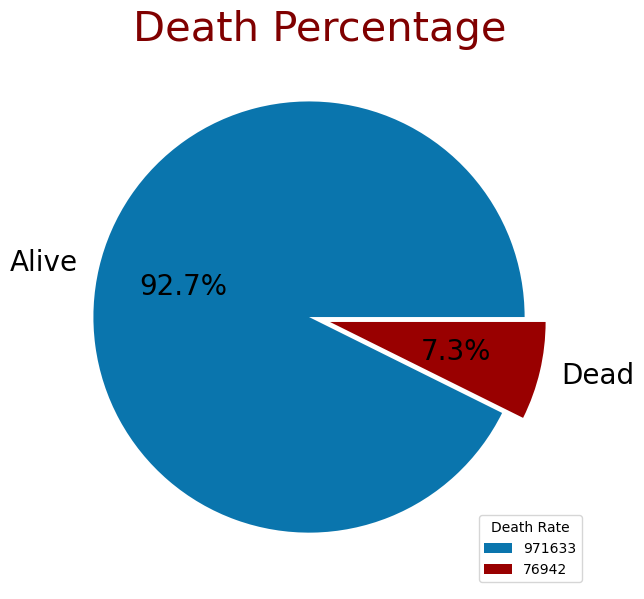

In [64]:
labels = ["Alive", "Dead"]
sizes = df['DEAD'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(df['DEAD'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

We can see that 76,942 patients have died representing 7.3% of the total number of patients in our dataset.

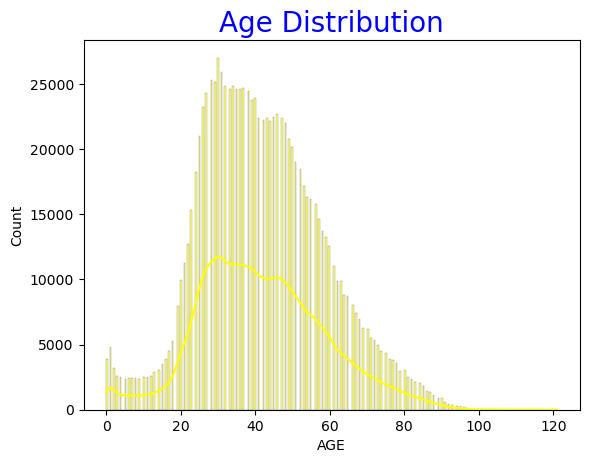

In [143]:
#

sns.histplot(x=df.AGE, kde = True, color = "yellow")
plt.title('Age Distribution', color = 'blue', fontsize = 20)
plt.show()

Recuerda que va disminuyendo el porcentaje por que la muestra es menor 

Recuerda que se puede analisar mas los datos si se tiene una evaluacion entre las perosnas fallecidas que tenian covid y entre las que no 

We noticed that the following diseases and habits have the highest impact:
1- Pneumonia
2- Hypertension
3- Diabetes
4- Tobacco usage
We also notice that Pneumonia patients are more likely to carry Covid with a higher ratio.¶

In [75]:
def Covid_or_Not(val):
    if val >= 4:
        return "Not a Covid 19 Carrier"
    else:
        return "A Covid 19 Carrier"

In [78]:
df_dead = df[df["DEAD"] == 1]

In [79]:
df_dead['Covid_or_Not'] = df_dead["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

In [80]:
df_dead["Covid_or_Not"].value_counts()

Covid_or_Not
A Covid 19 Carrier        54236
Not a Covid 19 Carrier    22706
Name: count, dtype: int64

In [81]:
df['Covid_or_Not'] = df["CLASIFFICATION_FINAL"].apply(Covid_or_Not)

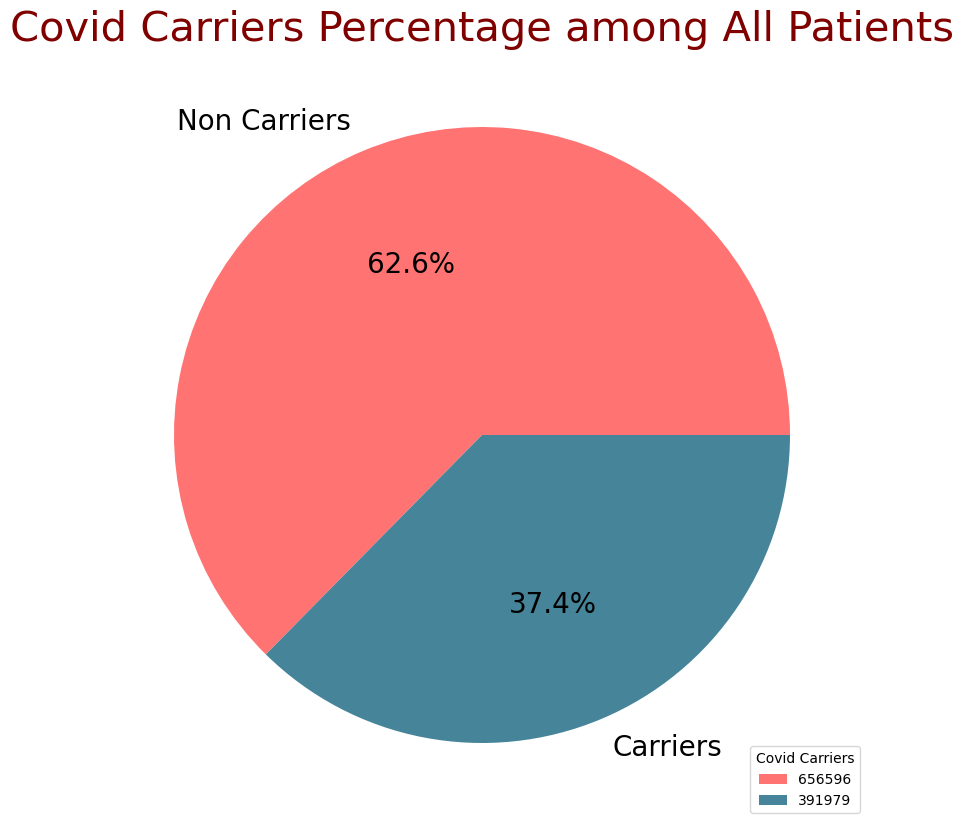

In [82]:
labels = ["Non Carriers", "Carriers"]
sizes = df['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20}, colors = colors)
plt.title('Covid Carriers Percentage among All Patients', color = 'Maroon', fontsize = 30)
plt.legend(df['Covid_or_Not'].value_counts(), loc = 'lower right', title = 'Covid Carriers')
plt.show()

In [89]:
df_model = df.drop(columns=['DATE_DIED','SEX'])

In [90]:
df_model.dropna(inplace = True)

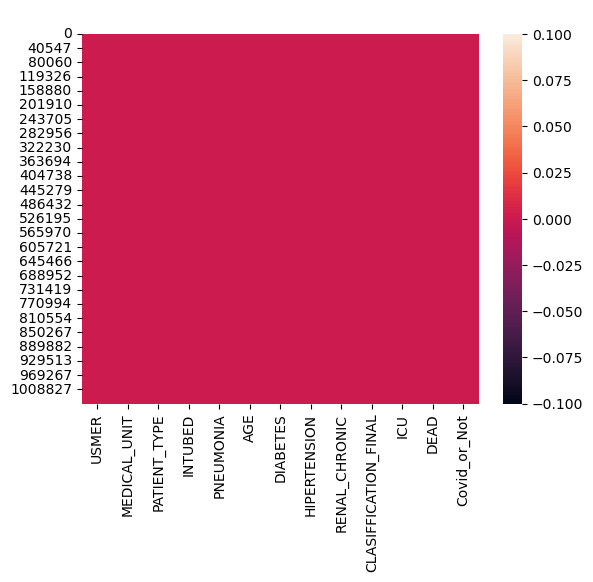

In [141]:
sns.heatmap(df_model.isnull())
plt.title('After Dropping the Remaining Missing Values', color = 'white', fontsize = 15)
plt.show()

In [92]:
df_model.Covid_or_Not.value_counts()

Covid_or_Not
Not a Covid 19 Carrier    633448
A Covid 19 Carrier        386025
Name: count, dtype: int64

In [93]:
unrelevant_features = ["PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df_model.drop(columns=unrelevant_features,inplace=True)

# Entrenamiento del modelo de regresión logística
En esta sección, concatenamos las características seleccionadas para formar la matriz X, mientras que la columna RISK es la variable objetivo (y). Dividimos los datos en conjuntos de entrenamiento y prueba, y entrenamos un modelo de regresión logística utilizando las características seleccionadas.

* Explicación de la implementación del modelo de regresión logística
La regresión logística fue elegida como el modelo para predecir el riesgo de complicaciones en pacientes con Covid-19 debido a su capacidad para modelar relaciones lineales entre las variables independientes y la variable dependiente binaria (RISK).

El proceso de implementación incluyó los siguientes pasos:

* División de datos: Se separaron los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.
1. Normalización: Las características fueron normalizadas para garantizar que todas estuvieran en la misma escala.
2. Entrenamiento: Se utilizó el conjunto de entrenamiento para ajustar el modelo a los datos.
3. Predicción: Se aplicó el modelo a los datos de prueba para predecir los resultados.

In [95]:
X = df_model.drop('DEAD' , axis= 1)
Y = df_model['DEAD']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [97]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [99]:
x_train.drop('Covid_or_Not',axis=1, inplace = True)
x_test.drop('Covid_or_Not',axis=1, inplace = True)

In [101]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

* Nota Importante
Siempre debemos dividir los datos en conjuntos de prueba y entrenamiento antes de aplicar cualquier técnica de remuestreo. Esto garantiza que las técnicas solo se apliquen en los conjuntos de entrenamiento (¡recuerda que nunca debemos modificar los conjuntos de prueba!).

El sobremuestreo antes de dividir los datos puede permitir que las mismas observaciones exactas estén presentes tanto en el conjunto de prueba como en el de entrenamiento, lo que puede conducir a una filtración de datos (Data Leakage). Esto le permite a nuestro modelo memorizar puntos de datos específicos, lo que provoca sobreajuste (overfitting).

In [102]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression Train Accuracy: ", lr.score(x_train,y_train), "\n")
print("Logistic Regression Test Accuracy: ", lr.score(x_test,y_test))

Logistic Regression Train Accuracy:  0.9050035869360015 

Logistic Regression Test Accuracy:  0.8935823072043735


In [103]:
#presicion
Classes = ['Not Dead', 'Dead']
print("Logistic Regression Classification Report:", "\n", classification_report(y_test, lr.predict(x_test), target_names = Classes))

Logistic Regression Classification Report: 
               precision    recall  f1-score   support

    Not Dead       0.99      0.89      0.94    284090
        Dead       0.39      0.92      0.55     21752

    accuracy                           0.89    305842
   macro avg       0.69      0.90      0.74    305842
weighted avg       0.95      0.89      0.91    305842



#### comparamos con XGB recomendacionn de copilot

In [104]:
XGB = XGBClassifier()
XGB.fit(x_train , y_train)
print("XGBoost Train Accuracy: ", XGB.score(x_train,y_train), "\n")
print("XGBoost Test Accuracy: ", XGB.score(x_test,y_test))

XGBoost Train Accuracy:  0.93847385312441 

XGBoost Test Accuracy:  0.9101562244557647


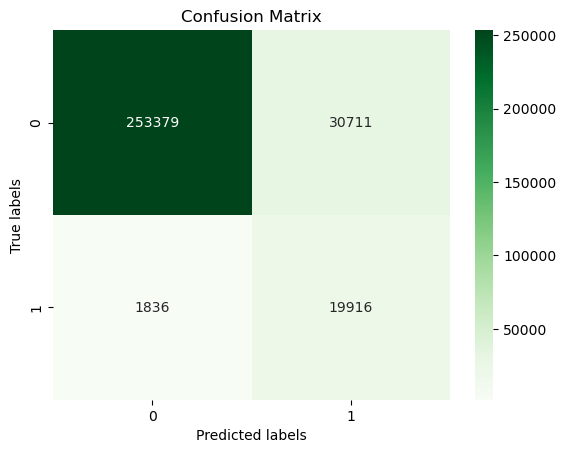

In [140]:
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

### Evaluación adicional: AUC y curva ROC
Además de la precisión, calculamos el AUC (Área bajo la curva ROC), que es una métrica más robusta para evaluar el rendimiento del modelo en problemas de clasificación binaria. También graficamos la curva ROC para visualizar el trade-off entre la tasa de verdaderos positivos y la tasa de falsos positivos.

AUC: 0.9530473625283162


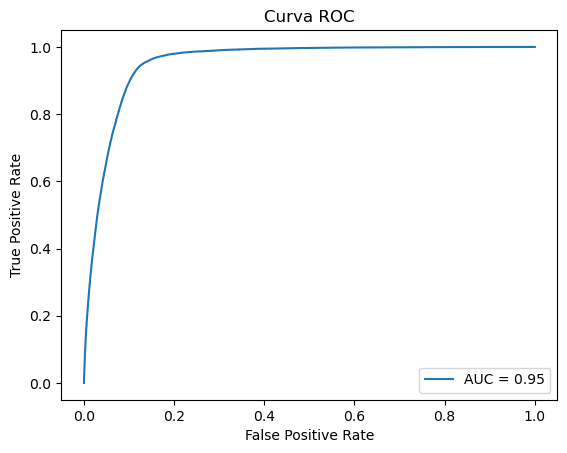

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Asegurarte de usar %matplotlib inline en un Jupyter Notebook
%matplotlib inline

# Predecir probabilidades para el cálculo de AUC
y_prob = model.predict_proba(x_test)[:, 1]

# Calcular AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc}")

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# Conclusion
Desafortunadamente, el 7.3% del total de los pacientes ha fallecido, de los cuales alrededor del 70.5% eran portadores de Covid.

En cuanto al total de portadores, representaban aproximadamente el 37.5% del total de pacientes.

Cerca del 14% de esos portadores han fallecido.

Descubrimos que la edad tiene un impacto significativo; a medida que aumenta, también lo hace la probabilidad de contraer el virus.

También encontramos que las personas que padecen obesidad son más propensas a portar el virus.

En cuanto al embarazo, no pudimos encontrar ningún impacto en la clasificación de Covid.

Notamos que los pacientes con "Neumonía", "Hipertensión", "Diabetes" y los usuarios de tabaco tienen una gran probabilidad de contraer el virus, siendo los pacientes con "Neumonía" los más afectados.

También observamos que hay una correlación positiva entre tener "Hipertensión" y "Diabetes"; la mayoría de los pacientes con una de estas dos enfermedades están expuestos a desarrollar la otra.

Vimos que, entre todos los pacientes con estas enfermedades, los pacientes clasificados con el tercer grado de Covid son, con mucha diferencia, los más numerosos.

Aproximadamente el 19% del total de pacientes fue hospitalizado, con un porcentaje de mortalidad del 35%.

La "Neumonía" tiene el mayor impacto en ese porcentaje (35%).

Alrededor del 91% de los pacientes fallecidos fueron hospitalizados.

Cerca del 9% de los pacientes hospitalizados fueron ingresados en la UCI, de los cuales aproximadamente el 56% fueron clasificados como portadores de Covid, y con un alto porcentaje de mortalidad de alrededor del 49%.

Las muertes fueron muy frecuentes a mediados de 2020, desde abril hasta agosto.

En cuanto a nuestro modelado, obtuvimos la mayor precisión del 92% utilizando los algoritmos "Random Forest" y "Decision Tree", pero al verificar el recall, descubrimos que esas precisiones eran engañosas. Por lo tanto, nos quedamos con "Regresión Logística", que logró excelentes puntuaciones tanto en precisión como en recall, con aproximadamente un 90%.

### Referencias:
Intubación
Alhazzani, W., Møller, M. H., Arabi, Y. M., Loeb, M., Gong, M. N., Fan, E., ... & Du, B. (2020). Surviving Sepsis Campaign: Guidelines on the management of critically ill adults with Coronavirus Disease 2019 (COVID-19). Intensive Care Medicine, 46(5), 854-887. https://doi.org/10.1007/s00134-020-06022-5

Neumonía
Zhou, F., Yu, T., Du, R., Fan, G., Liu, Y., Liu, Z., ... & Cao, B. (2020). Clinical course and risk factors for mortality of adult inpatients with COVID-19 in Wuhan, China: A retrospective cohort study. The Lancet, 395(10229), 1054-1062. https://doi.org/10.1016/S0140-6736(20)30566-3

Edad
Jordan, R. E., Adab, P., & Cheng, K. K. (2020). Covid-19: risk factors for severe disease and death. BMJ, 368, m1198. https://doi.org/10.1136/bmj.m1198

Embarazo
Ellington, S., Strid, P., Tong, V. T., Woodworth, K., Galang, R. R., Zambrano, L. D., ... & Meaney-Delman, D. (2020). Characteristics of women of reproductive age with laboratory-confirmed SARS-CoV-2 infection by pregnancy status—United States, January 22–June 7, 2020. Morbidity and Mortality Weekly Report, 69(25), 769-775. https://doi.org/10.15585/mmwr.mm6925a1

Diabetes
Huang, I., Lim, M. A., & Pranata, R. (2020). Diabetes mellitus is associated with increased mortality and severity of disease in COVID-19 pneumonia–A systematic review, meta-analysis, and meta-regression. Diabetes & Metabolic Syndrome: Clinical Research & Reviews, 14(4), 395-403. https://doi.org/10.1016/j.dsx.2020.04.018

EPOC
Halpin, D. M. G., Faner, R., Sibila, O., Badia, J. R., & Agustí, A. (2020). Do chronic respiratory diseases or their treatment affect the risk of SARS-CoV-2 infection? The Lancet Respiratory Medicine, 8(5), 436-438. https://doi.org/10.1016/S2213-2600(20)30167-3

Asma
Green, I., Merzon, E., Vinker, S., Golan-Cohen, A., Magen, E., & COVID-19 task force of Leumit Health Services. (2021). Asthma and risk of COVID-19 infection: A nationwide, population-based, nested case–control study. Journal of Allergy and Clinical Immunology, 148(3), 790-798. https://doi.org/10.1016/j.jaci.2021.07.003

Inmunosupresión
Fung, M., Babik, J. M. (2020). COVID-19 in immunocompromised hosts: What we know so far. Clinical Infectious Diseases, 72(2), 340-350. https://doi.org/10.1093/cid/ciaa863

Hipertensión
Pranata, R., Lim, M. A., Huang, I., Raharjo, S. B., & Lukito, A. A. (2020). Hypertension is associated with increased mortality and severity of disease in COVID-19 pneumonia: A systematic review, meta-analysis and meta-regression. Journal of the Renin-Angiotensin-Aldosterone System, 21(2), 1470320320926899. https://doi.org/10.1177/1470320320926899

Otras enfermedades
Richardson, S., Hirsch, J. S., Narasimhan, M., Crawford, J. M., McGinn, T., Davidson, K. W., & the Northwell COVID-19 Research Consortium. (2020). Presenting characteristics, comorbidities, and outcomes among 5700 patients hospitalized with COVID-19 in the New York City area. JAMA, 323(20), 2052-2059. https://doi.org/10.1001/jama.2020.6775

Enfermedades cardiovasculares
Clerkin, K. J., Fried, J. A., Raikhelkar, J., Sayer, G., Griffin, J. M., Masoumi, A., ... & Schwartz, A. (2020). Coronavirus disease 2019 (COVID-19) and cardiovascular disease. Circulation, 141(20), 1648-1655. https://doi.org/10.1161/CIRCULATIONAHA.120.046941

Obesidad
Popkin, B. M., Du, S., Green, W. D., Beck, M. A., Algaith, T., Herbst, C. H., ... & Shekar, M. (2020). Individuals with obesity and COVID-19: A global perspective on the epidemiology and biological relationships. Obesity Reviews, 21(11), e13128. https://doi.org/10.1111/obr.13128

Enfermedad renal crónica
Henry, B. M., Lippi, G. (2020). Chronic kidney disease is associated with severe coronavirus disease 2019 (COVID-19) infection. International Urology and Nephrology, 52(6), 1193-1194. https://doi.org/10.1007/s11255-020-02451-9

Tabaquismo
Vardavas, C. I., & Nikitara, K. (2020). COVID-19 and smoking: A systematic review of the evidence. Tobacco Induced Diseases, 18, 20. https://doi.org/10.18332/tid/119324
